In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:99%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

**<font size="5" color="red">ch1. NLTK 자연어 처리 패키지</font>**
# 1. NLTK 패키지
1. 텍스트 전처리 : 토큰화(어절, 문장 나누기), 정규표현식을 활용한 토큰화, 불용어제거, 기본형(어근)추출
2. 품사태깅 : 단어 품사식별
3. 구조화된 문서의 빈도수, 분류분석, 연관분석, 감성분석... (단점)NLTK 속도가 느림

In [2]:
import nltk

In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
nltk.download('omw-1.4')
# c:/nltk_data
# d:/nltk_data
# e:/nltk_data
# c:/Users/내컴퓨터이름/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/share/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/lib/nltk_data
# c:/Users/내컴퓨터이름/Appdata/Roaming/nltk_data

[nltk_data] Downloading package omw-1.4 to d:\nltk_data...


True

In [7]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [8]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [10]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:40])

[Emma by Jane Austen 1816]

VOLUME I

CH


In [11]:
len(emma)

887071

In [16]:
# sent_tokenize() : 문장단위로 쪼갠 list
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print("첫문장 : %r " % (sent_tokens[0]))
print('두번째 문장 : %r' % (sent_tokens[1]))
print('문장수 :', len(sent_tokens))

첫문장 : '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.' 
두번째 문장 : "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."
문장수 : 7456


In [17]:
# word_tokenize() : 단어 단위로 쪼갠 list 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [18]:
#  RegexpTokenizer클래스 : 토큰화할 때 정규표현식 이용
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('\w+')
words = ret.tokenize(sent_tokens[0])
print(words)

['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


# 2. 형태소(의미있는 가장 작은 말의 단위) 분석
- 자연어처리의 기본은 형태소 분석과 품사태깅 
    * 어간추출(stemming), 원형복원(lemmatizing), 품사태깅

In [20]:
words = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']
# 어간 추출 방법1
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem(words[0]), pst.stem(words[1]), pst.stem(words[2])

('send', 'cook', 'file')

In [21]:
[pst.stem(word) for word in words]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [22]:
# 어간 추출 방법2 - ※
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [23]:
# 어간 추출 방법3
words = ['sending', 'cooking', 'files', 'lives', 'crying', 'dying']
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

In [33]:
# 어간을 추출할 경우 의미가 달라지는 경우 있어 원형복원을 하기도 함
words2 = ['believes', 'cooking']
[lst.stem(word) for word in words2]

['believ', 'cook']

In [26]:
# 원형 복원
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()
[wl.lemmatize(word) for word in words2]

['belives', 'cooking']

In [29]:
# 품사태깅 : sent_tokens[10]
from nltk.tag import pos_tag
words = word_tokenize(sent_tokens[10])
tagged_list = pos_tag(words)
print('단어들 : ', words)
print('\n 품사태깅결과 :', tagged_list)

단어들 :  ['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']

 품사태깅결과 : [('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]


퀴즈 : emma 소설안에서
1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사 태깅을 하시오(RegexpTokenizer)
    * emma 소설의 글자수, 단어 출현수, 단어종류수, 품사태깅한 데이터 초반 10개 출력
2. "Emm" 단어가 몇 번 등장하며, 품사 태깅이 어떤 품사들로 되어 있는 모두 출력하시오(NNP, .. )
    * Emma 단어 출현 횟수, 분류된 품사들NNP, NNPS,..
3. 내가 원하는 품사(명사;NN, NNS,NNP, NNPS)의 단어만 뽑아 등장하는 명사의 종류 갯수를 출력하시오
    * 명사가 나온 횟수 : 30781
    * 출력한 명사의 수(반복제거) : 4165
    * 한단어가 나오는 평균 빈도수 : 평균 7.39번

In [36]:
import nltk
from nltk.tokenize import RegexpTokenizer # 3글자 이상의 단어 추출
from nltk.tag import pos_tag # 품사 태깅
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')

In [39]:
# 1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사 태깅을 하시오(RegexpTokenizer)
ret = RegexpTokenizer('[\w]{3,}')
words = ret.tokenize(emma)
emma_tags = pos_tag(words)
print('emma의 글자수 :', len(emma))
print('단어 출현수 :', len(words), len(emma_tags))
print('단어 종류수 :', len(set(words)))
print(emma_tags[:10])

emma의 글자수 : 887071
단어 출현수 : 123877 123877
단어 종류수 : 7630
[('Emma', 'NNP'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), ('VOLUME', 'NNP'), ('CHAPTER', 'NNP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), ('handsome', 'VBD'), ('clever', 'NN')]


In [40]:
# 2. Emma가 몇번 출현하는지? 품사는? (품사 태깅정보 : emma_tags)
pos = set()
cnt = 0
for word, tag in emma_tags:
    if word == 'Emma':
        cnt += 1
        pos.add(tag)
print('출현 횟수 :', cnt)
print('분류된 품사들 :', pos)

출현 횟수 : 865
분류된 품사들 : {'NN', 'VB', 'NNS', 'NNPS', 'VBP', 'JJ', 'RB', 'VBD', 'VBN', 'NNP'}


In [42]:
cnt = len([word for word, tag in emma_tags if word=='Emma'])
pos = set([tag for word, tag in emma_tags if word=='Emma'])
print('출현 횟수 :', cnt)
print('분류된 품사들 :', pos)

출현 횟수 : 865
분류된 품사들 : {'NN', 'VB', 'NNS', 'NNPS', 'VBP', 'JJ', 'RB', 'VBD', 'VBN', 'NNP'}


In [47]:
# Emma 단어의 태깅된 품사들의 갯수
import pandas as pd
pos_cnt = pd.Series([0]*len(pos), index= list(pos))
for word, tag in emma_tags:
    if word == 'Emma':
        pos_cnt[tag] += 1
pos_cnt.sort_values(ascending=False)

NNP     838
NN        7
VB        5
VBP       4
JJ        4
NNS       2
NNPS      2
RB        1
VBD       1
VBN       1
dtype: int64

In [58]:
# emma_tags를 데이터 프레임으로 바꿔서 연산
tags_df = pd.DataFrame(emma_tags, columns=['word','tag'])
pos_cnt = tags_df.loc[tags_df['word']=='Emma','tag']
print('Emma 출현 횟수 :', len(pos_cnt))
print('분류된 품사들과 출현횟수 :\n', pos_cnt.value_counts())

Emma 출현 횟수 : 865
분류된 품사들과 출현횟수 :
 NNP     838
NN        7
VB        5
VBP       4
JJ        4
NNS       2
NNPS      2
RB        1
VBN       1
VBD       1
Name: tag, dtype: int64


In [59]:
# 3. 명사들만 추출
nouns_list = [emma_t[0] for emma_t in emma_tags if (emma_t[1]=='NN') | (emma_t[1]=='NNS') 
                        | (emma_t[1]=='NNP') | (emma_t[1]=='NNPS')]

nouns_list = [emma_t[0] for emma_t in emma_tags if emma_t[1]=='NN' or emma_t[1]=='NNS' or
                        emma_t[1]=='NNP' or emma_t[1]=='NNPS']

nouns_list = [word for word, tag in emma_tags if tag in ['NN', 'NNS', 'NNP', 'NNPS']]

nouns_list = [word for word, tag in emma_tags if tag[0]=='N']
print('명사가 나온 횟수 :', len(nouns_list))
print('출현한 명사 수(반복제거) : ', len(set(nouns_list)))
print('한단어가 나오는 평균빈도수 : 평균',
     round(len(nouns_list) / len(set(nouns_list)),2), '번' )

명사가 나온 횟수 : 30781
출현한 명사 수(반복제거) :  4165
한단어가 나오는 평균빈도수 : 평균 7.39 번


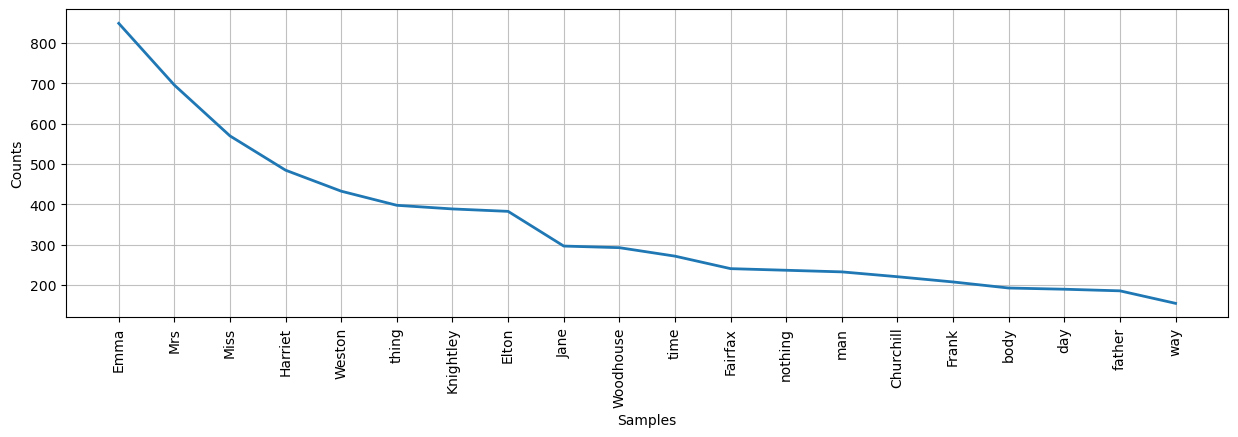

<Axes: xlabel='Samples', ylabel='Counts'>

In [60]:
# 명사들 중 최빈단어 시각화
import matplotlib.pyplot as plt
from nltk import Text
# Text : 단어 리스트와 빈도 분석에서 사용될 클래스
emma_text = Text(nouns_list)
plt.figure(figsize=(15, 4))
emma_text.plot(20)

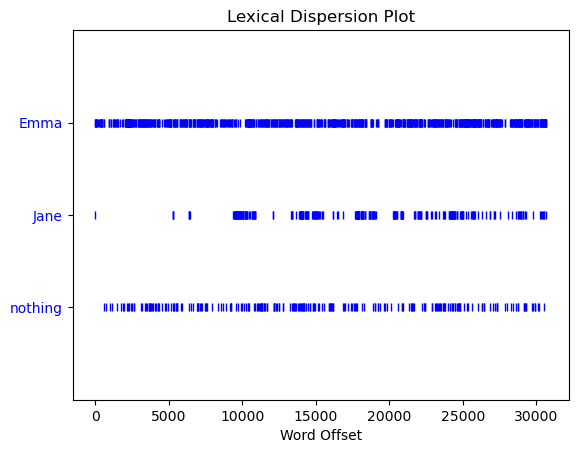

In [61]:
emma_text.dispersion_plot(['Emma','Jane','nothing'])

In [73]:
# 고유명사(이름) 출현 빈도
name_list = [word for word, tag in emma_tags if tag in ['NNP','NNPS']]

freq_dict = {}
for name in name_list:
    if name in freq_dict.keys():
        freq_dict[name] += 1
    else:
        freq_dict[name] = 1
#print(freq_dict)

In [74]:
from nltk import FreqDist
FreqDist(name_list)

FreqDist({'Emma': 840, 'Mrs': 696, 'Miss': 569, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})

In [76]:
# 150번 이상 반복되는 이름들만 출력
for name, freq in FreqDist(name_list).items():
    if freq > 150 :
        print(name, '-', freq)

Emma - 840
Jane - 295
Woodhouse - 293
Miss - 569
Weston - 433
Mrs - 696
Hartfield - 155
Knightley - 389
Elton - 382
Churchill - 221
Frank - 208
Harriet - 484
Fairfax - 241


In [79]:
# 위의 내용을 정렬
dic = dict(FreqDist(name_list))
# dic = freq_dict
wordcnt = pd.Series(dic)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt.head(13)

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64

In [80]:
# 150번 이상 출현한 이름을 정렬해서 출력
wordcnt[wordcnt>150]

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64